SIN-392 - Introduction to Digital Image Processing (2023-1)

# Lecture 08 - Image segmentation - Edges

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/)) 

-----

* Segmenting an image consists of subdividing an image into objects or regions that make it up.

## Importing the libraries

In [1]:
import numpy as np

from scipy import ndimage as ndi
from skimage import color, util, feature

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### %matplotlib notebook

### Loading a test image

In [2]:
# Loading a test image
img_rgb = plt.imread('./images/paisagem_02.png')

# If the image has a transparency channel, remove it
if img_rgb.ndim == 3 and img_rgb.shape[2] == 4:
    img_rgb = img_rgb[:,:,0:3]

# Prints information about the image
print(type(img_rgb))
print(img_rgb.shape)
print(img_rgb.dtype)
print('%.2f, %.2f, %.2f' % (img_rgb.min(), img_rgb.max(), img_rgb.mean()))

<class 'numpy.ndarray'>
(512, 512, 3)
float32
0.00, 0.95, 0.55


In [3]:
# Convert to intensity image (gray levels)
img = color.rgb2gray(img_rgb)

# img = util.img_as_ubyte(img)

# Prints information about the image
print(type(img))
print(img.shape)
print(img.dtype)
print('%.2f, %.2f, %.2f' % (img.min(), img.max(), img.mean()))

<class 'numpy.ndarray'>
(512, 512)
float32
0.23, 0.87, 0.60


In [4]:
img_gray = plt.imread('./images/boat.tif')

img_gray = util.img_as_float(img_gray)

# Prints information about the image
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) float64 0.0 0.9372549019607843


In [5]:
#### CHOOSE THE IMAGE THAT WILL BE PROCESSED ####
#### Comment the other line ####
# ---------------------------------------------
## img = img # Paisagem (imagem artificial)
img = img_gray # Boat (imagem real)

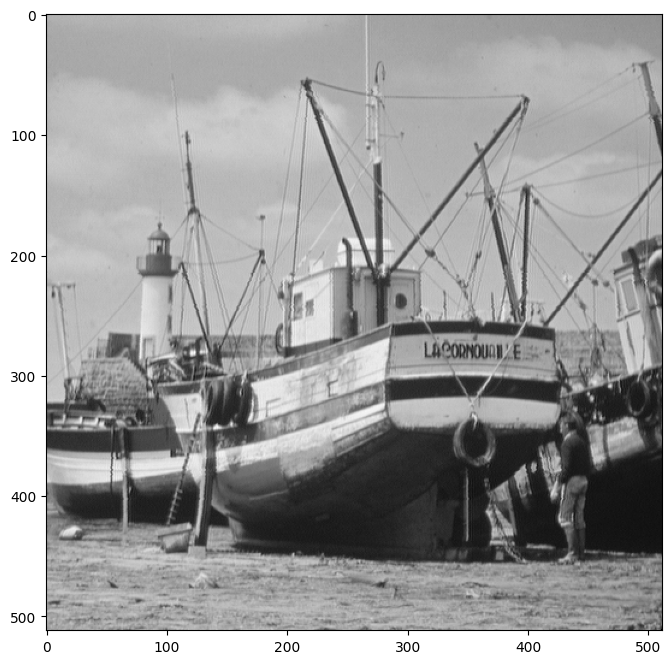

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.show()

## Using Laplacian to Detect Edges

In [7]:
lap_8 = np.array([[1,  1, 1],
                  [1, -8, 1],
                  [1,  1, 1]], dtype=float)
print(lap_8)

# Apply the Laplacian filter using convolution.
img_lap_8 = ndi.convolve(img, lap_8)                  

# Corrects negative values considering the absolute value
img_lap_8_abs = np.abs(img_lap_8)

# Corrects negative values by converting to zero.
img_lap_8_pos = np.array(img_lap_8)
img_lap_8_pos[img_lap_8 < 0] = 0

[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]


In [8]:
# Prints information about the resulting images
print(img_lap_8.shape, img_lap_8.dtype)
print('%.2f, %.2f, %.2f' % (img_lap_8.min(), img_lap_8.max(), img_lap_8.mean()))

print(img_lap_8_abs.shape, img_lap_8_abs.dtype)
print('%.2f, %.2f, %.2f' % (img_lap_8_abs.min(), img_lap_8_abs.max(), img_lap_8_abs.mean()))

print(img_lap_8_pos.shape, img_lap_8_pos.dtype)
print('%.2f, %.2f, %.2f' % (img_lap_8_pos.min(), img_lap_8_pos.max(), img_lap_8_pos.mean()))     

(512, 512) float64
-2.56, 2.52, 0.00
(512, 512) float64
0.00, 2.56, 0.16
(512, 512) float64
0.00, 2.52, 0.08


### Plotting the resulting images

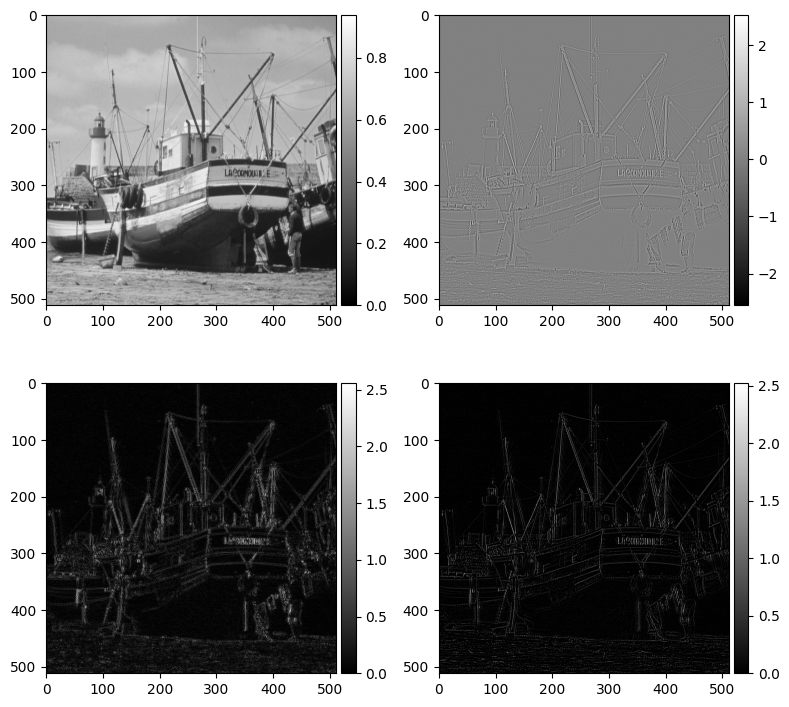

In [9]:
img_lap8_list = [img, img_lap_8, img_lap_8_abs, img_lap_8_pos]

fig, ax  = plt.subplots(2, 2, figsize=(8,8))
for i, (img_lap) in enumerate(img_lap8_list):

    img_ = ax[i//2,i%2].imshow(img_lap, cmap='gray')
    # Color bar
    divider = make_axes_locatable(ax[i//2,i%2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
    fig.tight_layout()
    
plt.show()

### Generating a binary representation of edges

In [10]:
img_lap_8_abs_bw = img_lap_8_abs > 0.2
img_lap_8_pos_bw = img_lap_8_pos > 0.2

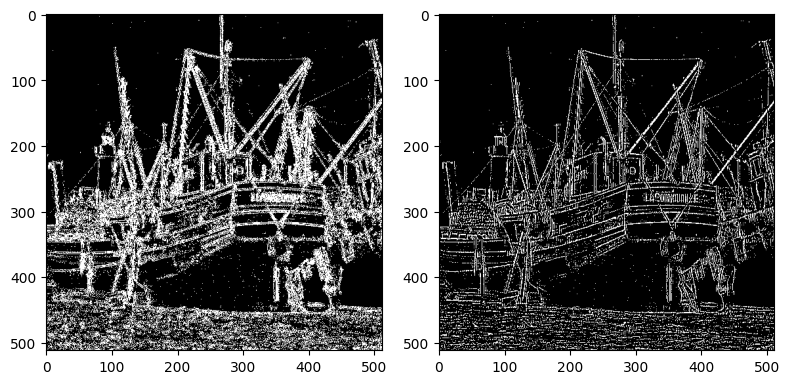

In [11]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(8, 4))

img_ = ax1.imshow(img_lap_8_abs_bw, cmap='gray')
# Color bar
# divider = make_axes_locatable(ax1)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(img_, cax=cax)
fig.tight_layout()

img_ = ax2.imshow(img_lap_8_pos_bw, cmap='gray')
# Color bar
# divider = make_axes_locatable(ax2)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(img_, cax=cax)
fig.tight_layout()
      
plt.show()

## Detecting lines in specific directions with the Laplacian

In [12]:
lap_hor = np.array([[-1, -1, -1],
                    [ 2,  2,  2],
                    [-1, -1, -1]], dtype=float)

lap_45p = np.array([[ 2, -1, -1],
                    [-1,  2, -1],
                    [-1, -1,  2]], dtype=float)

lap_ver = np.array([[-1,  2, -1],
                    [-1,  2, -1],
                    [-1,  2, -1]], dtype=float)

lap_45n = np.array([[-1, -1,  2],
                    [-1,  2, -1],
                    [ 2, -1, -1]], dtype=float)

In [13]:
# Apply the Laplacian filter using convolution.
img_lap_hor = ndi.convolve(img, lap_hor)   

img_lap_45p = ndi.convolve(img, lap_45p)   

img_lap_ver = ndi.convolve(img, lap_ver)   

img_lap_45n = ndi.convolve(img, lap_45n)   

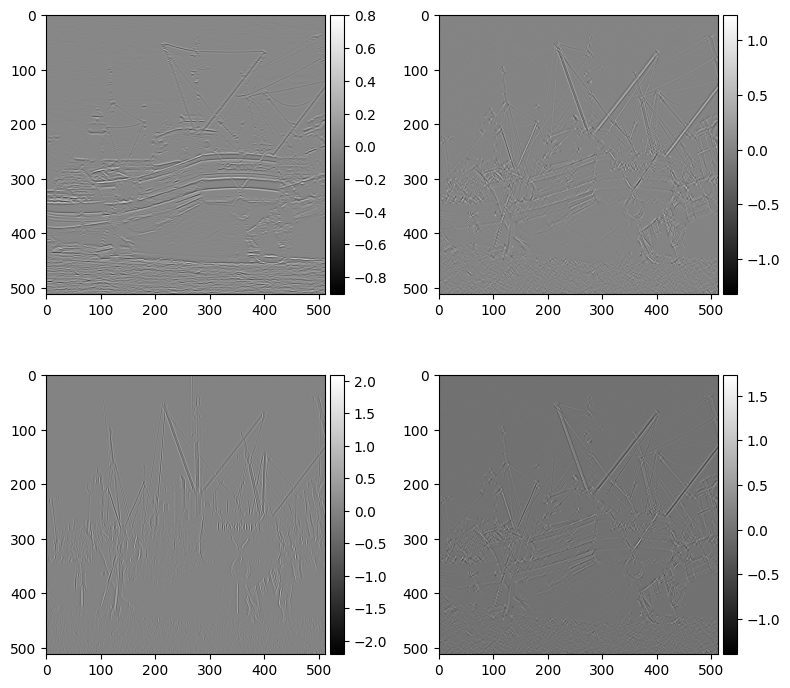

In [14]:
img_lap_dir = [img_lap_hor, img_lap_45p, img_lap_ver, img_lap_45n]

fig, ax  = plt.subplots(2, 2, figsize=(8,8))
for i, (img_lap) in enumerate(img_lap_dir):

    img_ = ax[i//2,i%2].imshow(img_lap, cmap='gray')
    #Color bar
    divider = make_axes_locatable(ax[i//2,i%2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
    fig.tight_layout()
    
plt.show()

## Using Gradient to Detect Edges

In [15]:
# Using Gradient to Detect Edges

# Sobel Operators
w_sob_h = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=float)

w_sob_v = np.array([[-1,  0,  1],
                    [-2,  0,  2],
                    [-1,  0,  1]], dtype=float)

img_sob_h  = ndi.convolve(img, w_sob_h)
img_sob_v  = ndi.convolve(img, w_sob_v)

# Gradient magnitude (hypotenuse)
img_sob = np.sqrt(img_sob_h**2 + img_sob_v**2)

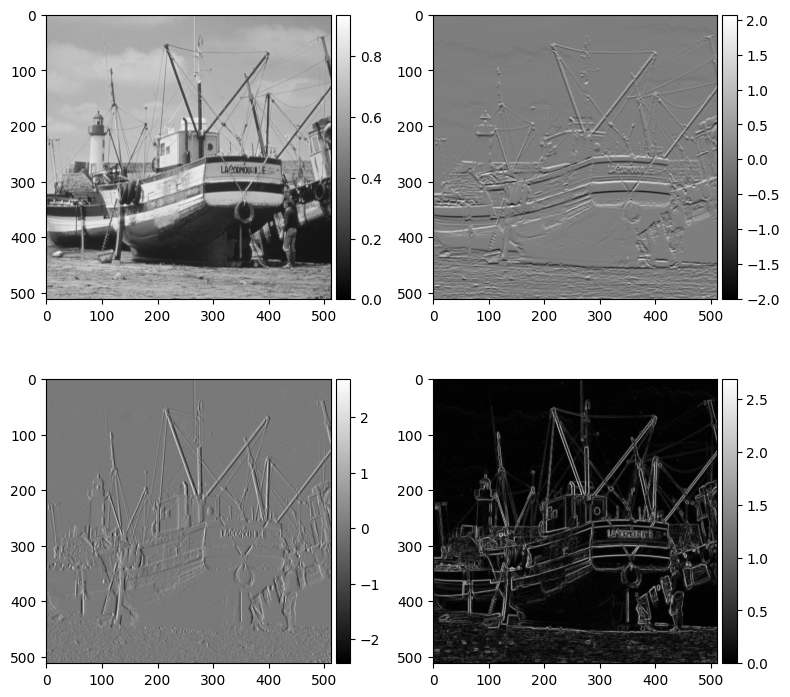

In [16]:
img_sob_list = [img, img_sob_h, img_sob_v, img_sob]

fig, ax  = plt.subplots(2, 2, figsize=(8,8))
for i, (img_sob) in enumerate(img_sob_list):

    img_ = ax[i//2,i%2].imshow(img_sob, cmap='gray')
    # Color bar
    divider = make_axes_locatable(ax[i//2,i%2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
    fig.tight_layout()
    
plt.show()

### Threshold with a very low value

In [17]:
img_sob_bw = img_sob > 0.5

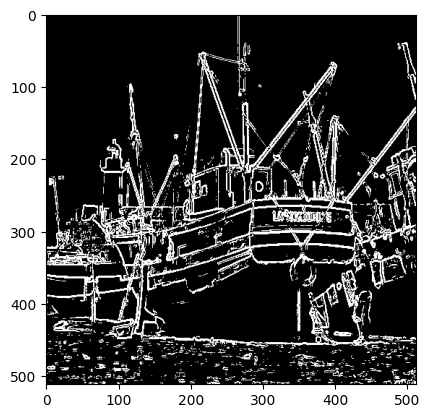

In [18]:
plt.figure()
plt.imshow(img_sob_bw, cmap='gray')
plt.show()


## Effect of smoothing on edge detection

In [19]:
# Applying Gaussian noise to the image
img_noise_1 = util.random_noise(img, mode='gaussian', var=0.01)
img_noise_3 = util.random_noise(img, mode='gaussian', var=0.03)
img_noise_5 = util.random_noise(img, mode='gaussian', var=0.05)

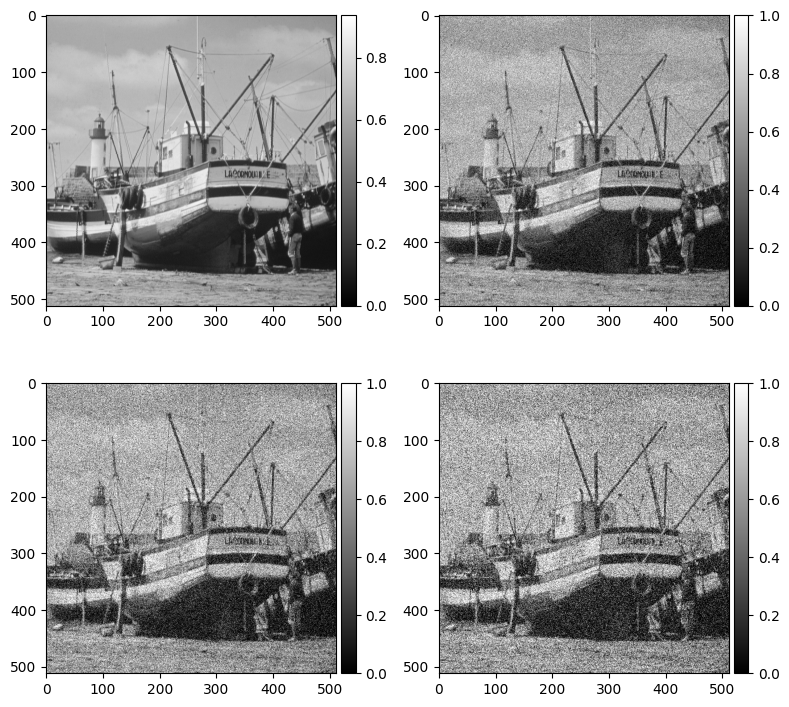

In [20]:
img_noise_list = [img, img_noise_1, img_noise_3, img_noise_5]

fig, ax  = plt.subplots(2, 2, figsize=(8,8))
for i, (img_lap) in enumerate(img_noise_list):

    img_ = ax[i//2,i%2].imshow(img_lap, cmap='gray')
    # Color bar
    divider = make_axes_locatable(ax[i//2,i%2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
    fig.tight_layout()
    
plt.show()

In [21]:
# Applying the Laplacian

img_lap_list_2 = []
img_lap_bw_list_2 = []

lap_8 = np.array([[1,  1, 1],
                  [1, -8, 1],
                  [1,  1, 1]], dtype=float)
print(lap_8)

for img in img_noise_list:
    # Apply the Laplacian filter using convolution.
    img_lap_8 = ndi.convolve(img, lap_8)    
    
    img_lap_8_pos = np.array(img_lap_8)
    img_lap_8_pos[img_lap_8 < 0] = 0
    
    img_lap_list_2.append(img_lap_8_pos)
    img_lap_bw_list_2.append(img_lap_8_pos > 0.2)

[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]


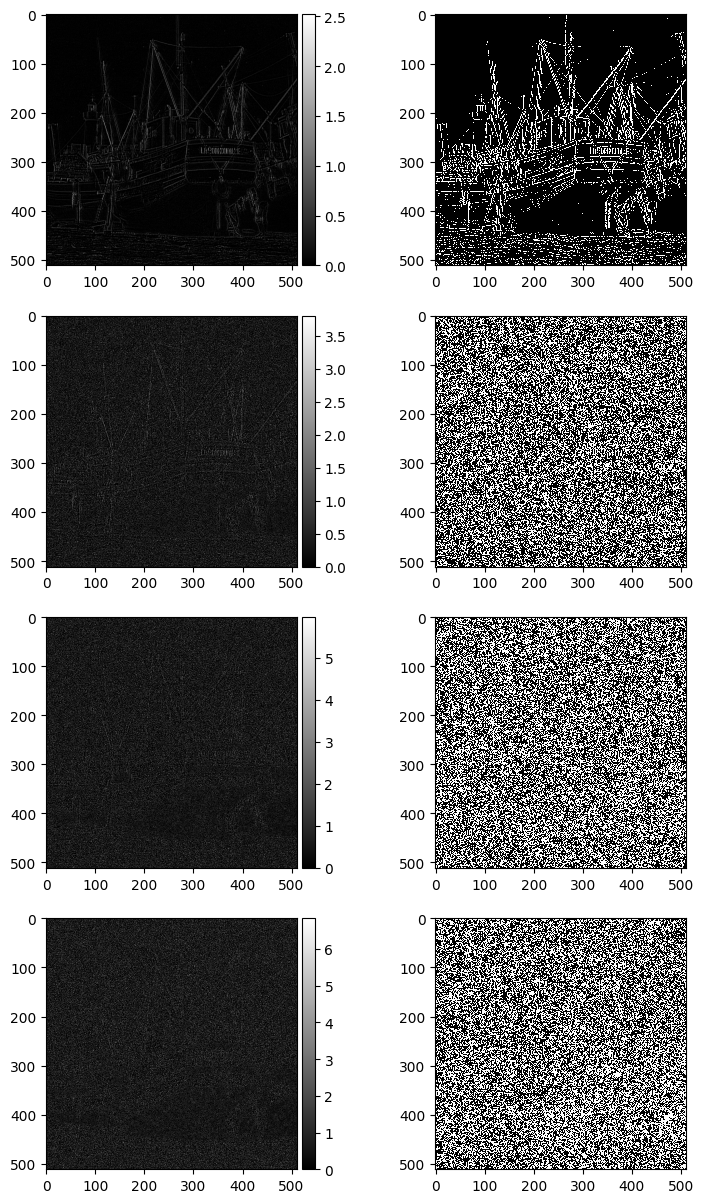

In [22]:
fig, ax  = plt.subplots(4, 2, figsize=(9, 15))
for i, (img_lap, img_lap_bw) in enumerate(zip(img_lap_list_2, img_lap_bw_list_2)):

    img_ = ax[i,0].imshow(img_lap, cmap='gray')
    # Color bar
    divider = make_axes_locatable(ax[i, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
    
    ax[i,1].imshow(img_lap_bw, cmap='gray', interpolation='nearest')
    
plt.show()

In [23]:
# Applying Sobel

img_sob_list_2 = []
img_sob_bw_list_2 = []

for img in img_noise_list:
    img_sob_h  = ndi.convolve(img, w_sob_h)
    img_sob_v  = ndi.convolve(img, w_sob_v)

    # Gradient magnitude (hypotenuse)
    img_sob = np.sqrt(img_sob_h**2 + img_sob_v**2)
    
    img_sob_list_2.append(img_sob)    
    img_sob_bw_list_2.append(img_sob > 0.5)

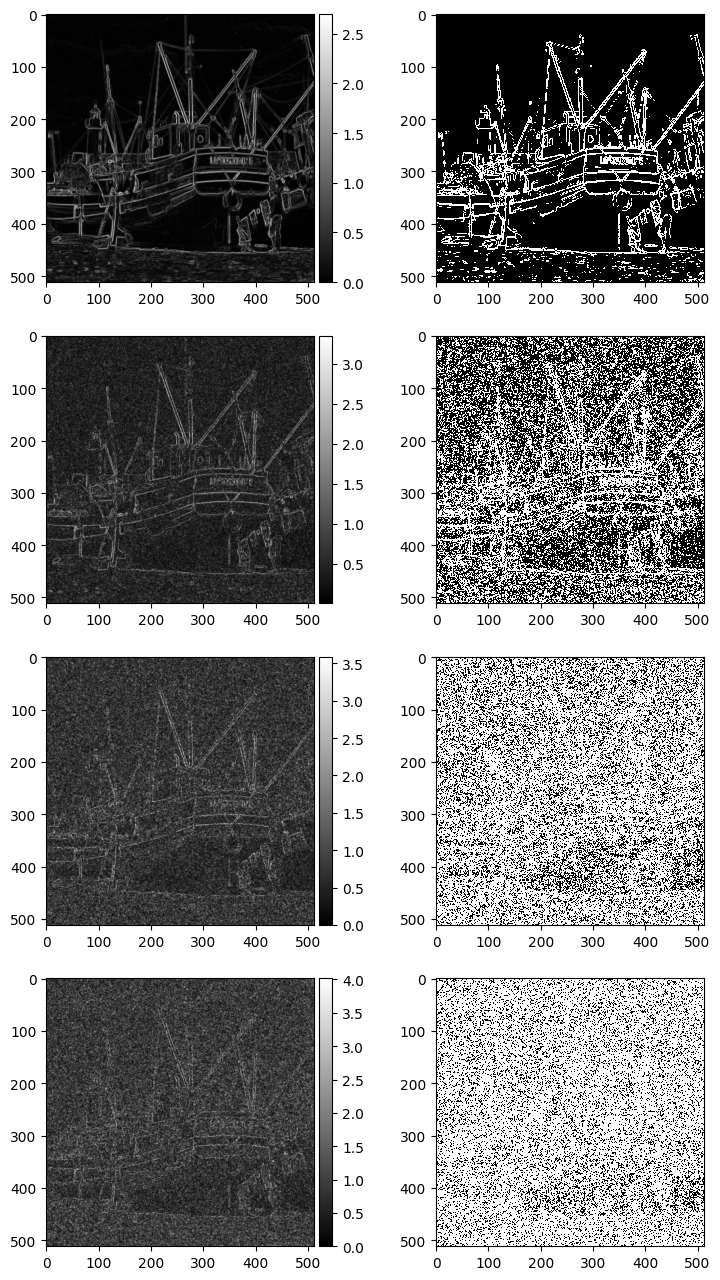

In [24]:
fig, ax  = plt.subplots(4, 2, figsize=(9, 16))
for i, (img_sob, img_sob_bw) in enumerate(zip(img_sob_list_2, img_sob_bw_list_2)):

    img_ = ax[i,0].imshow(img_sob, cmap='gray')
    # Color bar
    divider = make_axes_locatable(ax[i, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
        
    ax[i,1].imshow(img_sob_bw, cmap='gray', interpolation='nearest')
    
plt.show()

In [25]:
# Applying a 5x5 mean filter

mean_5 = np.ones([5, 5]) / (25)

img_mean_list = []

for img in img_noise_list:
    img_mean_temp = ndi.convolve(img, mean_5)
    img_mean_list.append(img_mean_temp) 

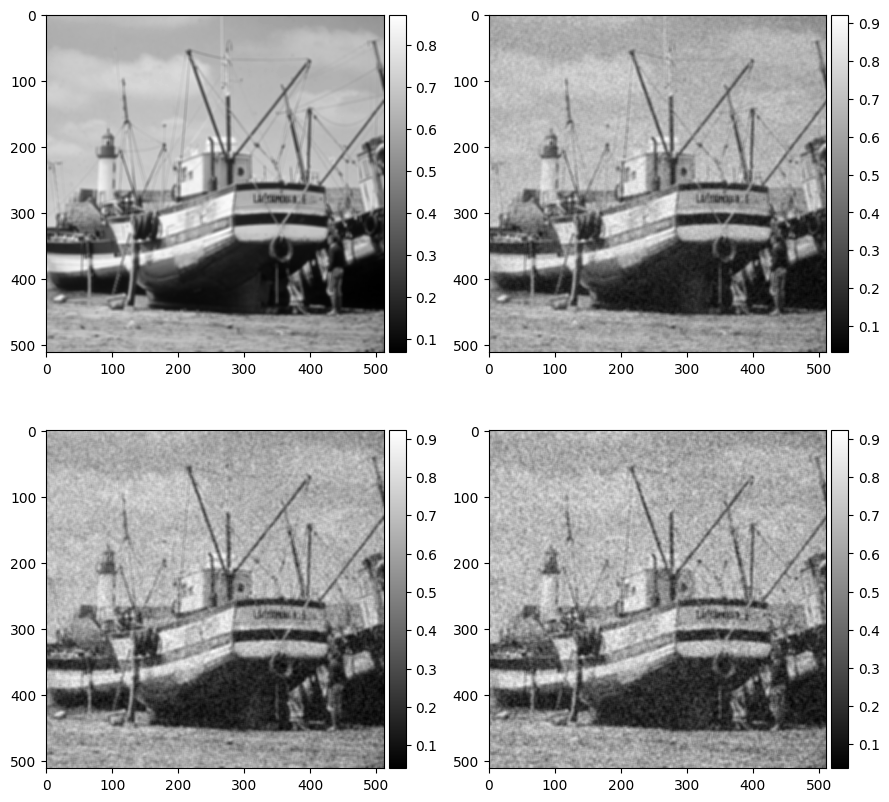

In [26]:
fig, ax  = plt.subplots(2, 2, figsize=(9, 9))
for i, (img_lap) in enumerate(img_mean_list):

    img_ = ax[i//2,i%2].imshow(img_lap, cmap='gray')
    # Color bar
    divider = make_axes_locatable(ax[i//2,i%2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
    fig.tight_layout()
    
plt.show()

In [27]:
# Applying the Laplacian

img_mean_lap_list_2 = []
img_mean_lap_bw_list_2 = []

lap_8 = np.array([[1,  1, 1],
                  [1, -8, 1],
                  [1,  1, 1]], dtype=float)
print(lap_8)

for img in img_mean_list:
    # Apply the Laplacian filter using convolution.
    ### img_lap_8 = np.abs(ndi.convolve(img, lap_8))
    img_lap_8 = ndi.convolve(img, lap_8)        
    
    img_lap_8_pos = np.array(img_lap_8)
    img_lap_8_pos[img_lap_8 < 0] = 0
    
    img_mean_lap_list_2.append(img_lap_8_pos)
    img_mean_lap_bw_list_2.append(img_lap_8_pos > 0.1)

[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]


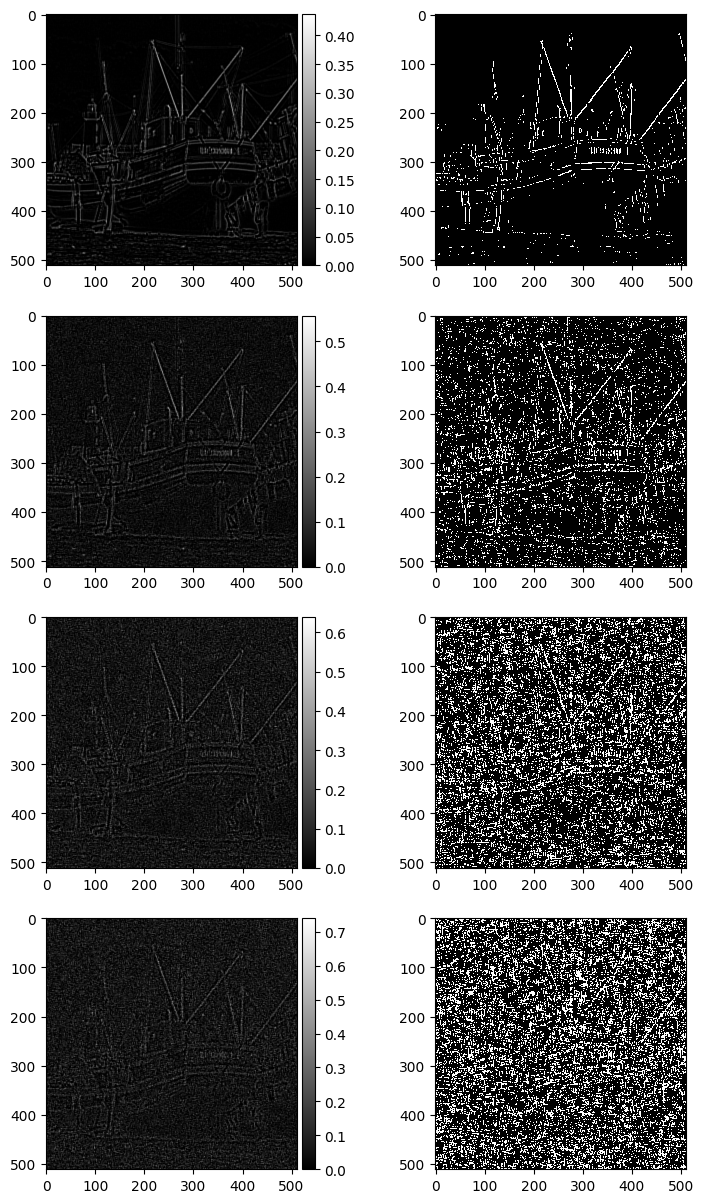

In [28]:
fig, ax  = plt.subplots(4, 2, figsize=(9, 15))
for i, (img_mean_lap, img_mean_lap_bw) in enumerate(zip(img_mean_lap_list_2, img_mean_lap_bw_list_2)):

    img_ = ax[i,0].imshow(img_mean_lap, cmap='gray')
    # Color bar
    divider = make_axes_locatable(ax[i, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
    
    ax[i,1].imshow(img_mean_lap_bw, cmap='gray', interpolation='nearest')
    
plt.show()

In [29]:
# Applying the Sobel
img_mean_sob_list_2 = []
img_mean_sob_bw_list_2 = []

for img in img_mean_list:
    img_sob_h  = ndi.convolve(img, w_sob_h)
    img_sob_v  = ndi.convolve(img, w_sob_v)

    # Gradient magnitude (hypotenuse)
    img_sob = np.sqrt(img_sob_h**2 + img_sob_v**2)
    
    img_mean_sob_list_2.append(img_sob)    
    img_mean_sob_bw_list_2.append(img_sob > 0.2)

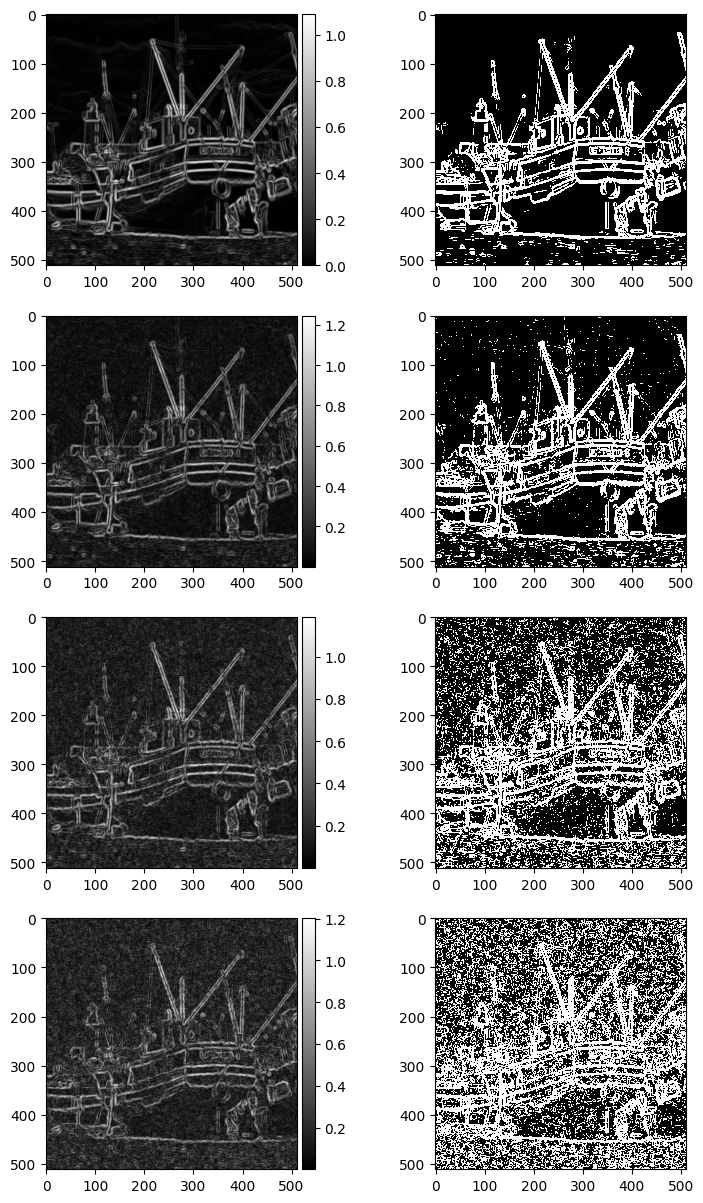

In [30]:
fig, ax  = plt.subplots(4, 2, figsize=(9, 15))
for i, (img_sob, img_sob_bw) in enumerate(zip(img_mean_sob_list_2, img_mean_sob_bw_list_2)):

    img_ = ax[i,0].imshow(img_sob, cmap='gray')
    # Color bar
    divider = make_axes_locatable(ax[i, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img_, cax=cax)
    
    ax[i,1].imshow(img_sob_bw, cmap='gray', interpolation='nearest')
    
plt.show()

## Canny Edge Detector

In [31]:
img_canny_list = []

for img in img_mean_list:
    img_canny = feature.canny(img)
    img_canny_list.append(img_canny)    
    

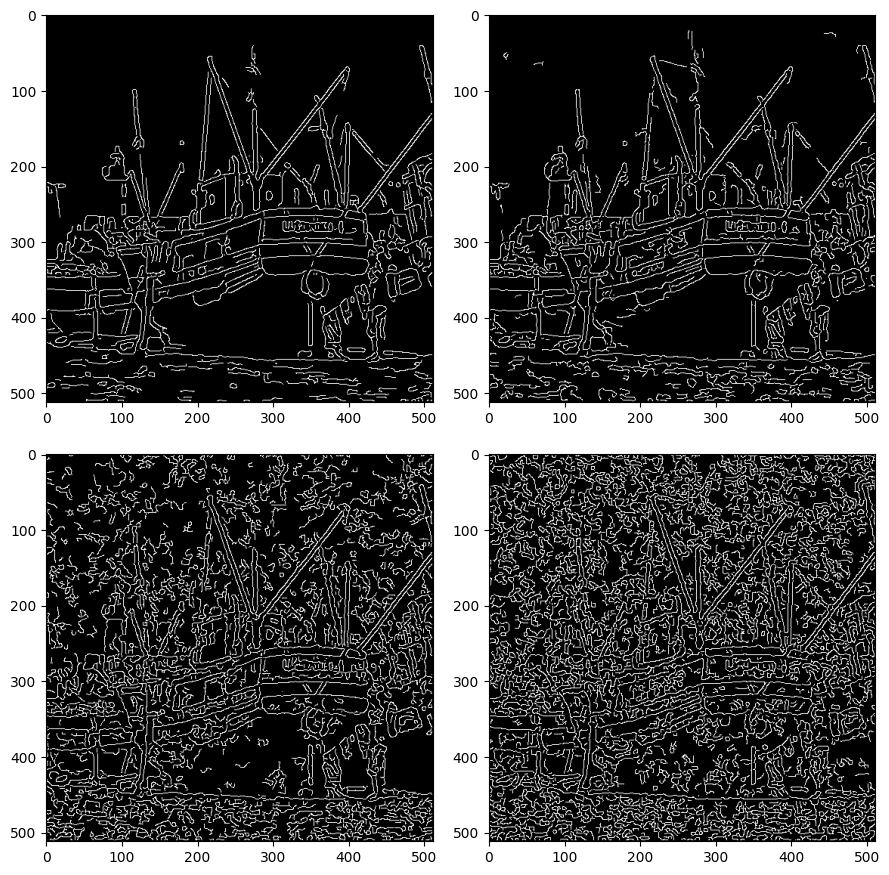

In [32]:
fig, ax  = plt.subplots(2, 2, figsize=(9, 9))
for i, (img_canny) in enumerate(img_canny_list):

    img_ = ax[i//2,i%2].imshow(img_canny, cmap='gray')

    fig.tight_layout()
    
plt.show()

## Bibliography
---

* GONZALEZ, R.C.; WOODS, R.E.; Digital Image Processing. 3rd edition. Pearson, 2009.
* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * In Brazilian Portuguese.
    * Available for download on the author's website (Personal use only).
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  
* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * In Brazilian Portuguese.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  
* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
* The USC-SIPI Image Database    
    * http://sipi.usc.edu/database/database.php
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * http://scipy-lectures.org/
* scikit-image. Documentation.
    * https://scikit-image.org/docs/dev/index.html
* scikit-image. Documentation. Module 'filters'.
    * https://scikit-image.org/docs/dev/api/skimage.filters.html
* scikit-image. Documentation. Module 'feature'.
    * https://scikit-image.org/docs/dev/api/skimage.feature.html
* scikit-image. Canny edge detector.
    * https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html
* OpenCV. Canny Edge Detection.
    * https://docs.opencv.org/master/da/d22/tutorial_py_canny.html
* NumPy. Documentation.
    * https://numpy.org/doc/stable/
* NumPy. Convolution
    * https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html